In [1]:
include("main.jl");
pta = PTA(c=365.25/14, σRMS=1e2, NP=36, TObs=5.);

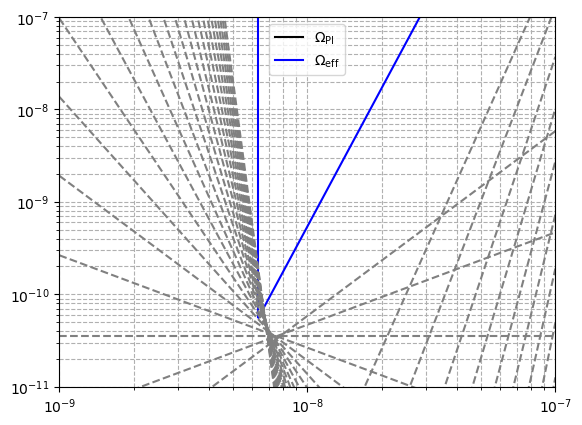

  9.848767 seconds (34.77 M allocations: 2.031 GiB, 6.50% gc time)


In [2]:
function plotΩPI(det::PTA; figure_file=nothing, 
        plotΩPI=true, plotΩeff=false, plotΩPILines=false)
    
    fs, ΩPIResult, ΩPILines  = ΩPI(det)
    Ωeffs = 5*det.Ωeff.(fs)
    
    xlim(det.fPlotRange)
    ylim(det.ΩPlotRange)    
    
    grid("on", which="both", linestyle="--")
    
    if plotΩPI != false
        loglog(fs, ΩPIResult, "black", label=L"Ω$_{\mathrm{PI}}$")        
    end
    
    if plotΩeff==true
        loglog(fs, Ωeffs, "b", label=L"Ω$_{\mathrm{eff}}$")
        if typeof(det)==PTA 
            vlines(det.fMin, 5*det.Ωeff(det.fMin), det.ΩPlotRange[2], "b")
        end
    end
    
    if plotΩPILines==true 
        [loglog(fs, ΩPILines[i], "--", color="gray") for i in 1:length(ΩPILines)]
    end
    
    legend()
    show()
end

pta = PTA(c=365.25/14, σRMS=1e2, NP=36, TObs=5.);
@time plotΩPI(pta, plotΩeff=true, plotΩPILines=true)

In [33]:
function SNR(pta::PTA, β, Ωβ)
    # increase precision
    β, Ωβ = big(β), big(Ωβ)
    
    Δt = pta.Δt # (s)
    σ = pta.σRMS*1e-9 # (s)
    A = 16*π^4*Δt*σ^2/H0^2
    b = β-5
    
    fMin, fMax, fRef = pta.fMin, pta.fMax, big(pta.fRef) 
    
    N = pta.NP
    
    T = pta.TObs * YEAR # (s)
    ζ2 = 1/48. # square of the average of Hellings and Downs factor
    
    # B*f^b/A
    Bfb(f) = Ωβ*(f/fRef)^β*f^(-5.)/A
    
    int(f) = f/b * (b + 1/(1 + Bfb(f)) 
        - (1+b)*_₂F₁(1, 1/b, 1+1/b, - Bfb(f)))
    
    snr2 = 2T*N*(N-1)/2*ζ2*(int(fMax) - int(fMin))
#     snr2^(1/2)
end

pta = PTA();
SNR(pta, 3, 1e-40), SNR(pta, 3, 1e40)

(6.252481552486703111161970952802962474619569908243065198313179547368181205279186e-61, -9.59204234094619091930074878561154435669410237530308388760409906890821506768761e+08)